#8-1. 합성곱 신경망의 구성 요소

##합성곱
: 밀칩층과 비슷하게 입력과 가중치를 곱하고 절편을 더하는 선형 계산
- 첫 번째 합성곱에 사용된 가중치가 두 번째 합성곱에도 동일하게 사용됨
- 합성곱 신경망에서는 뉴런 = 필터= 커널
- 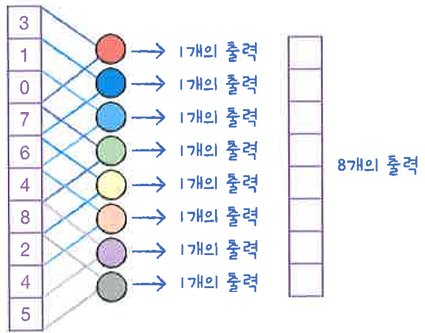
- 특성 맵: 합성곱 계산을 통해 얻은 출력
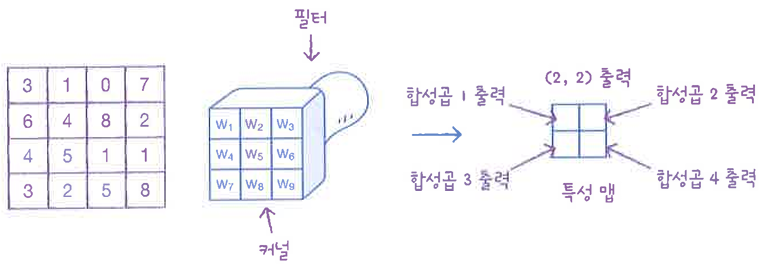

##패딩
: 입력 배열의 주위를 가상의 원소로 채우는 것
 - 실제 입력값이 아니기 때문에 패딩은 0으로 채운다.
 - 패딩의 역할은 커널이 도장을 찍을 횟수를 늘려주는 것 밖에 없다.
 - 패딩을 사용하는 이유: 네 모서리가 한번씩만 찍힌다. -> 중요한 정보가 특성맵으로 잘 전달되지 않을 가능성이 있다.
- 세임 패딩: 입력과 특성 맵의 크기를 동일하게 만들기 위해 입력 주위에 0으로 패딩하는 것
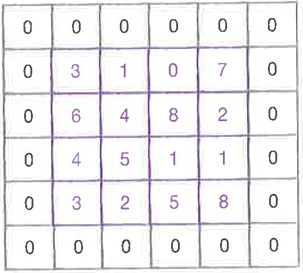
- 밸리드 패딩: 패딩 없이 순수한 입력 배열에서만 합성곱을 하여 특성 맵을 만드는 경우
 - 특성 맵의 크기가 줄어들 수 밖에 없다.
- 스트라이드: 합성곱 층에서 칠터가 입력 위를 이동하는 크기 (기본값:1)

##폴링
: 가중치가 없고 특성 맵의 가로세로 크기를 줄이는 역할을 수행
 - 최대 풀링 or 평균 풀링: 도작을 찍은 영역에서 가장 큰 값을 고르거나 평균값을 계산


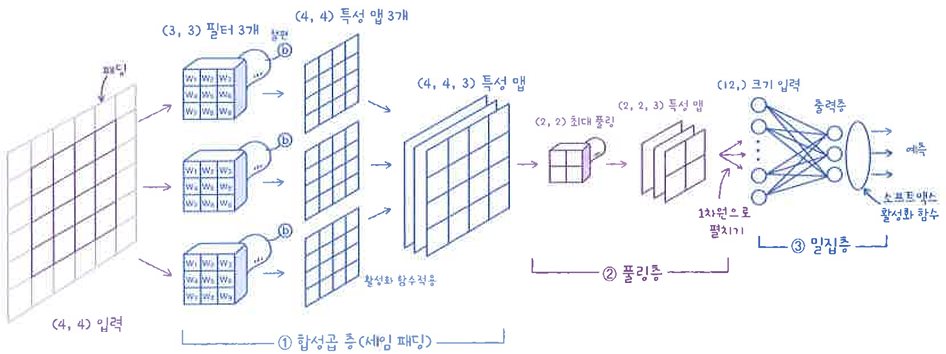

#8-2. 합성곱 신경망을 사용한 이미지 분류

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
model.add(keras.layers.MaxPooling2D(2))

In [4]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

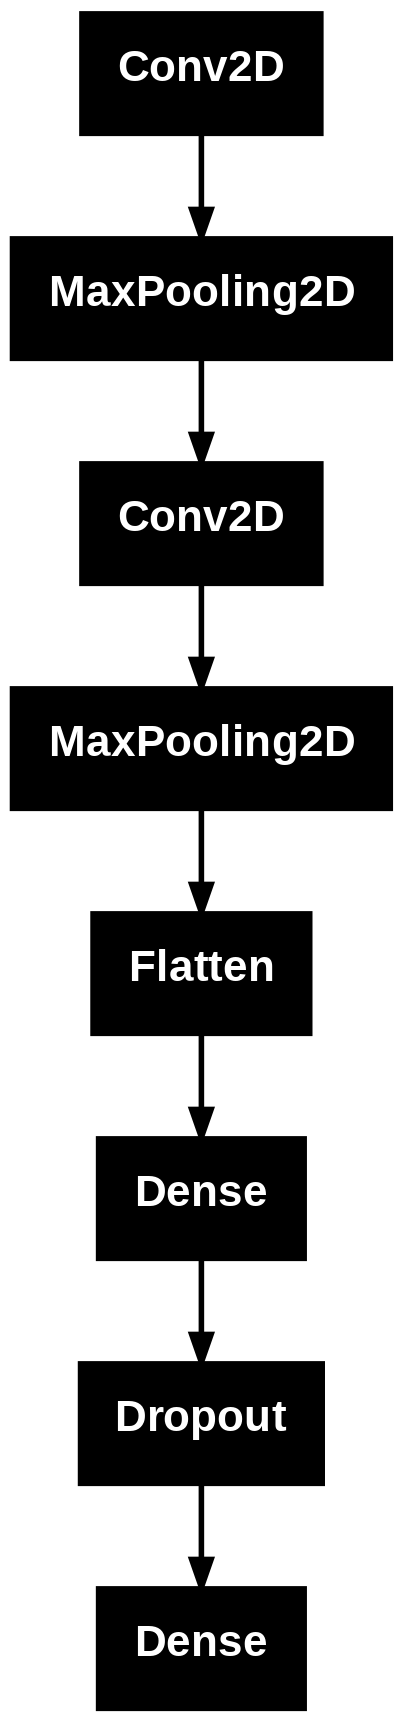

In [7]:
keras.utils.plot_model(model) #층의 구성을 그림으로 표현

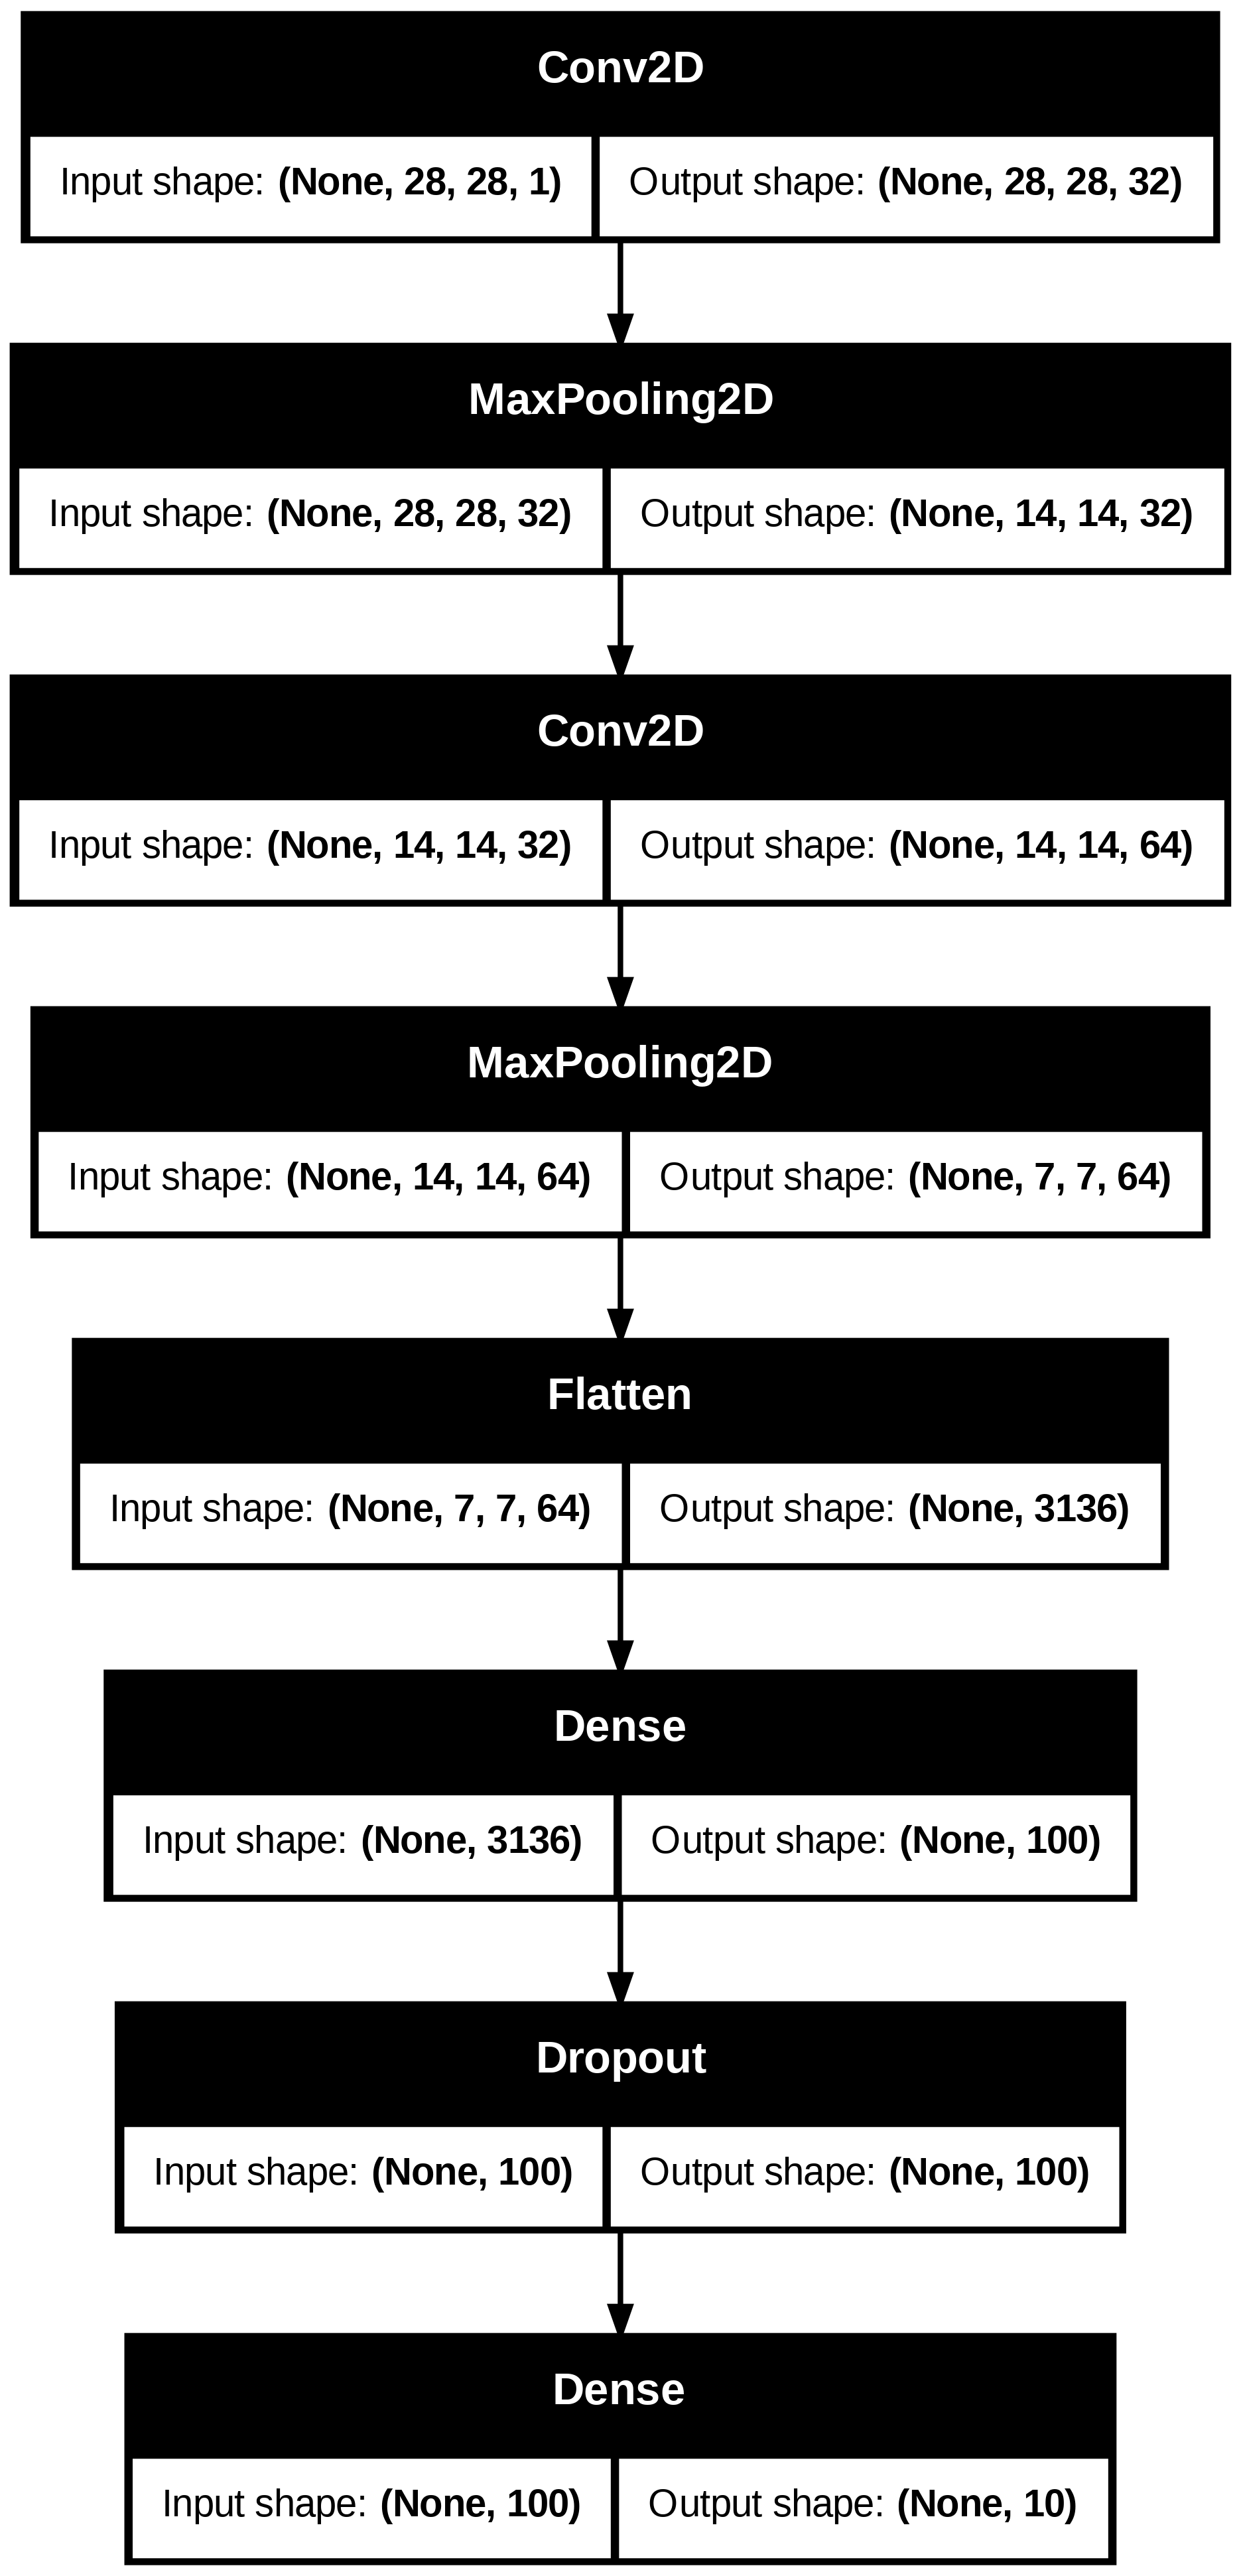

In [9]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png',dpi=300)

- show_shapes: 입력과 출력의 크기를 표시
- to_file: 출력한 이미지를 파일로 저장
- dpi: 해상도 지정

In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras')#최상의 모델 저장
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target,epochs=20, validation_data=(val_scaled, val_target),callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.7404 - loss: 0.7262 - val_accuracy: 0.8827 - val_loss: 0.3202
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 112s 64ms/step - accuracy: 0.8721 - loss: 0.3631 - val_accuracy: 0.8992 - val_loss: 0.2727
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 112s 44ms/step - accuracy: 0.8901 - loss: 0.2999 - val_accuracy: 0.9070 - val_loss: 0.2588
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 62s 42ms/step - accuracy: 0.9044 - loss: 0.2660 - val_accuracy: 0.9137 - val_loss: 0.2385
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 92s 48ms/step - accuracy: 0.9137 - loss: 0.2405 - val_accuracy: 0.9141 - val_loss: 0.2384
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 74s 43ms/step - accuracy: 0.9236 - loss: 0.2085 - val_accuracy: 0.9185 - val_loss: 0.2226
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.9265 - loss: 0.1971 - val_accuracy: 0.9228 - val_loss: 0.2154
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.9334

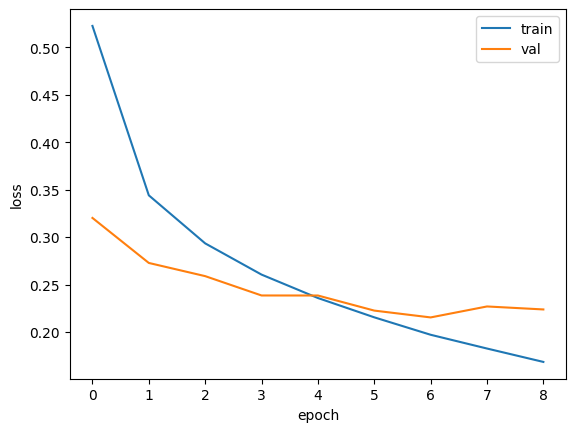

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [16]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9232 - loss: 0.2098


[0.21535925567150116, 0.9228333234786987]

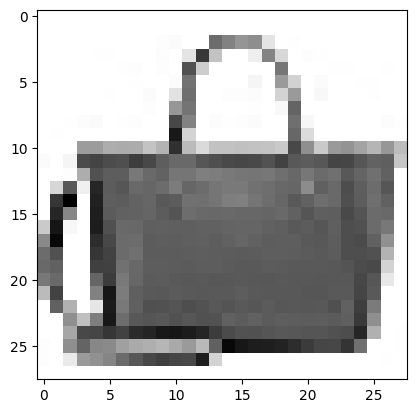

In [18]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [19]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
[[6.76257756e-14 2.96460601e-19 2.60586113e-16 1.28280455e-14
  9.37687390e-16 7.62910802e-15 1.64861207e-14 3.73608742e-15
  1.00000000e+00 1.09265207e-15]]


- 아홉 번재 값이 1 이고 다른 값은 거의 0에 가까움 -> 아홉번째 클래스이다.

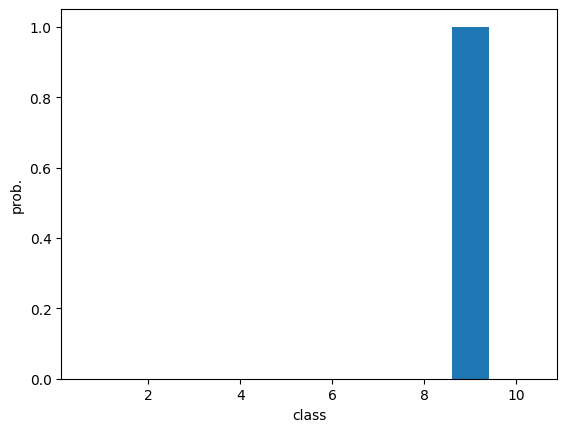

In [20]:
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [21]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']

In [24]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [25]:
test_scaled= test_input.reshape(-1,28,28,1) / 255.0

In [26]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9156 - loss: 0.2443


[0.2371203601360321, 0.9157999753952026]